In [20]:
import numpy as np
import scipy
from scipy.interpolate import BSpline
from scipy.interpolate import _bspl

import matplotlib.pyplot as plt

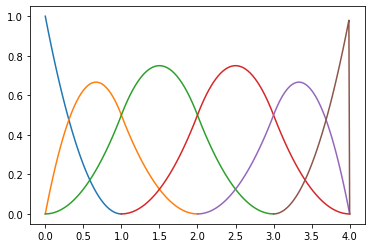

In [81]:
#kv = [0, 1, 2, 3]
kvs = [[0,0,0,1], [0,0,1,2], [0,1,2,3], [1,2,3,4], [2,3,4,4], [3,4,4,4]]
for kv in kvs:
    b = BSpline.basis_element(kv)
    n = 100
    xx = np.linspace(kv[0],kv[-1],n)
    plt.plot(xx, b(xx))

In [40]:
print(np.linspace(0,3,4))

[0. 1. 2. 3.]


In [184]:
# get knot vectors
def get_kvs(rmin, rmax, nbins, order):
    nknots = order+2
    kvs = np.empty((nbins, nknots))

    width = (rmax-rmin)/(nbins-order)
    print(width)
    for i in range(order):
        val = i+1
        kvs[i,:] = np.concatenate((np.full(nknots-val, rmin), np.linspace(rmin+width, rmin+width*val, val)))
        kvs[nbins-i-1] = np.concatenate((np.linspace(rmax-width*val, rmax-width, val), np.full(nknots-val, rmax)))
    for j in range(nbins-2*order):
        idx = j+order
        kvs[idx] = rmin+width*j + np.arange(0,nknots)*width                     
    return kvs

def get_bases(rmin, rmax, nbins, order, ncont=300):
    if nbins<order*2:
        # does it have to be 2*order + 1? seems fine for piecewise, but for higher orders?
        raise ValueError("nbins must be at least twice the order")
    kvs = get_kvs(rmin, rmax, nbins, order)
    print(kvs)
    rcont = np.linspace(rmin, rmax, ncont)
    bases = np.empty((nbins, ncont))
    for n in range(nbins):
        kv = kvs[n]
        b = BSpline.basis_element(kv)
        bases[n,:] = [b(r) if kv[0]<=r<=kv[-1] else 0 for r in rcont]
    return bases

In [186]:
rmin = 0
rmax = 4
nbins = 5
order = 2
bases = get_bases(rmin, rmax, nbins, order)

1.3333333333333333
[[0.         0.         0.         1.33333333]
 [0.         0.         1.33333333 2.66666667]
 [0.         1.33333333 2.66666667 4.        ]
 [1.33333333 2.66666667 4.         4.        ]
 [2.66666667 4.         4.         4.        ]]


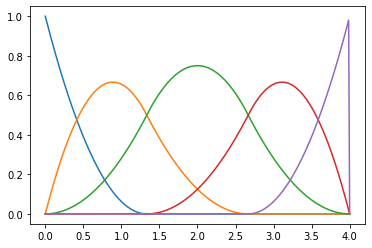

In [187]:
for n in range(nbins):
    plt.plot(rcont, bases[n])

[0. 0. 0. 1.]
[0. 0. 1. 2.]
[0. 1. 2. 3.]
[1. 2. 3. 4.]
[2. 3. 4. 4.]
[3. 4. 4. 4.]


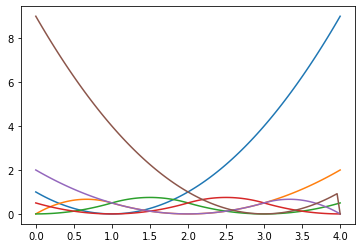

In [71]:
ncont = 100
for n in range(nbins):
    kv = kvs[n]
    print(kv)
    b = BSpline.basis_element(kv)
    xx = np.linspace(rmin,rmax,ncont)
    #xx = np.linspace(kv[0],kv[-1],ncont)
    plt.plot(xx, b(xx))

In [6]:
k = 3
t = [0., 2., 2., 3., 4.]   # internal knots
a, b = t[0], t[-1]    # base interval is [a, b)
t = [a]*k + t + [b]*k  # add boundary knots
xx = np.linspace(a, b, 100)

[ 3.          2.93939394  2.87878788  2.81818182  2.75757576  2.6969697
  2.63636364  2.57575758  2.51515152  2.45454545  2.39393939  2.33333333
  2.27272727  2.21212121  2.15151515  2.09090909  2.03030303  1.96969697
  1.90909091  1.84848485  1.78787879  1.72727273  1.66666667  1.60606061
  1.54545455  1.48484848  1.42424242  1.36363636  1.3030303   1.24242424
  1.18181818  1.12121212  1.06060606  1.          0.93939394  0.87878788
  0.81818182  0.75757576  0.6969697   0.63636364  0.57575758  0.51515152
  0.45454545  0.39393939  0.33333333  0.27272727  0.21212121  0.15151515
  0.09090909  0.03030303 -0.03030303 -0.09090909 -0.15151515 -0.21212121
 -0.27272727 -0.33333333 -0.39393939 -0.45454545 -0.51515152 -0.57575758
 -0.63636364 -0.6969697  -0.75757576 -0.81818182 -0.87878788 -0.93939394
 -1.         -1.06060606 -1.12121212 -1.18181818 -1.24242424 -1.3030303
 -1.36363636 -1.42424242 -1.48484848 -1.54545455 -1.60606061 -1.66666667
 -1.72727273 -1.78787879 -1.84848485 -1.90909091 -1.9

TypeError: a bytes-like object is required, not 'list'

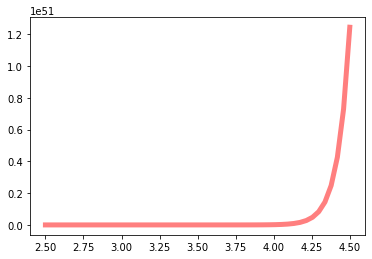

In [21]:
kk = np.linspace(k,-k,100)
print(kk)
bsp = BSpline.basis_element(kk)
plt.plot(xx, bsp(xx), 'r-', lw=5, alpha=0.5)
c = ['b', 'g', 'c', 'k']

# Now we use slide an interval ``t[m]..t[m+1]`` along the base interval
#    ``a..b`` and use `evaluate_all_bspl` to compute the restriction of
#    the B-spline of interest to this interval:
for i in range(k+1):
    x1, x2 = t[2*k - i], t[2*k - i + 1]
    xx = np.linspace(x1 - 0.5, x2 + 0.5)
    yy = [_bspl.evaluate_all_bspl(t, k, x, 2*k - i)[i] for x in xx]
    plt.plot(xx, yy, c[i] + '--', lw=3, label=str(i))

plt.grid(True)
plt.legend()